# Задание:
+ Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
+ Для выбранного датасета (датасетов) решить следующие задачи:

1) обработку пропусков в данных;

2) кодирование категориальных признаков;

3) масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/titanic.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(418, 11)

In [4]:
# типы колонок
data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# пропущенные значения
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 418


# Обработка пропусков в данных

## Удаление

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((418, 11), (418, 8))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((418, 11), (87, 11))

In [10]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna({'age':0})
data_new_3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Внедрение значений

In [12]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age. Тип данных float64. Количество пустых значений 86, 20.57%.
Колонка Fare. Тип данных float64. Количество пустых значений 1, 0.24%.


In [13]:
data_num = data[num_cols]
data_num

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875
5,14.0,9.2250
6,30.0,7.6292
7,26.0,29.0000
8,18.0,7.2292
9,21.0,24.1500


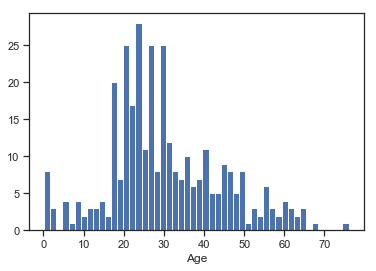

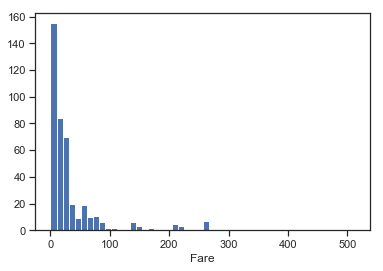

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
data[data['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S


In [16]:
flt_index = data[data['Age'].isnull()].index
flt_index

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [17]:
data_num[data_num.index.isin(flt_index)]['Age']

10    NaN
22    NaN
29    NaN
33    NaN
36    NaN
39    NaN
41    NaN
47    NaN
54    NaN
58    NaN
65    NaN
76    NaN
83    NaN
84    NaN
85    NaN
88    NaN
91    NaN
93    NaN
102   NaN
107   NaN
108   NaN
111   NaN
116   NaN
121   NaN
124   NaN
127   NaN
132   NaN
133   NaN
146   NaN
148   NaN
       ..
268   NaN
271   NaN
273   NaN
274   NaN
282   NaN
286   NaN
288   NaN
289   NaN
290   NaN
292   NaN
297   NaN
301   NaN
304   NaN
312   NaN
332   NaN
339   NaN
342   NaN
344   NaN
357   NaN
358   NaN
365   NaN
366   NaN
380   NaN
382   NaN
384   NaN
408   NaN
410   NaN
413   NaN
416   NaN
417   NaN
Name: Age, Length: 86, dtype: float64

In [18]:
data_num_Age = data_num[['Age']]
data_num_Age.head()

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [26]:
strategies=['mean', 'median','most_frequent']

In [31]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [33]:
test_num_impute_col(data, 'Age', strategies[2])

('Age',
 'most_frequent',
 86,
 21.0,
 21.0,
 array([21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
        21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
        21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
        21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
        21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
        21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21., 21.,
        21., 21., 21., 21., 21., 21., 21., 21.]))

# Преобразование категориальных признаков в числовые

## Кодирование категорий целочисленными значениями

In [34]:
data = pd.read_csv('datasets/titanic.csv', sep=",")
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
data["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
le = LabelEncoder()
emb_le = le.fit_transform(data['Embarked'])

In [39]:
np.unique(emb_le)

array([0, 1, 2])

In [40]:
le.inverse_transform([0, 1, 2])

array(['C', 'Q', 'S'], dtype=object)

# Масштабирование данных

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [43]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Age']])

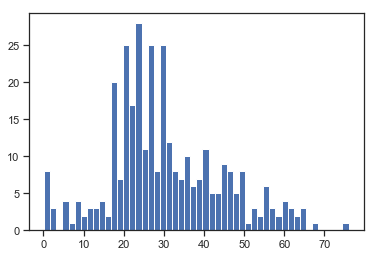

In [44]:
plt.hist(data['Age'], 50)
plt.show()

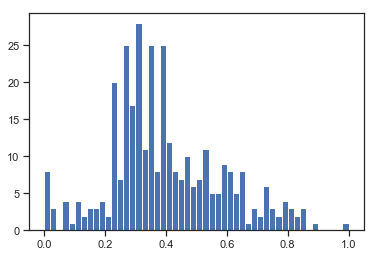

In [45]:
plt.hist(sc1_data, 50)
plt.show()